In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [4]:
df = pd.read_csv("../Resources/turnoverData.csv")
for col in df.columns: 
    print(col) 

Age
Attrition
BusinessTravel
DailyRate
Department
DistanceFromHome
Education
EducationField
EmployeeCount
EmployeeNumber
EnvironmentSatisfaction
Gender
HourlyRate
JobInvolvement
JobLevel
JobRole
JobSatisfaction
MaritalStatus
MonthlyIncome
MonthlyRate
NumCompaniesWorked
Over18
OverTime
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StandardHours
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


In [5]:
df_skinny = df.drop(['EducationField','EmployeeCount','EmployeeNumber','StandardHours','MaritalStatus','DailyRate','MonthlyRate','HourlyRate','Over18','OverTime'], axis=1).drop_duplicates()
df_skinny.rename(columns={"Attrition": "EmploymentStatus"}, inplace=True)

Note: 
EmploymentStatus: 0=Active, 1=Terminated
Gender: 0=female, 1=male
PerformanceRating: 
Business Travel:  0=no travel, 1=rarely, 2=frequently
Department: HR=0, R&D=1, Sales=2
JobRole: Sales Executive = 0, Sales Representative = 1, Research Scientist = 2, Research Director = 3, Laboratory Technician = 4, Manufacturing Director = 5, Healthcare Representative = 6, Human Resources = 7, Manager = 8



In [7]:
# Change qualitative data to numeric form

df_skinny['EmploymentStatus'] = df_skinny['EmploymentStatus'].replace(['Yes','No'],[1,0])
df_skinny['Gender']=df_skinny['Gender'].replace(['Female','Male'],[0,1])
df_skinny['BusinessTravel'] = df_skinny['BusinessTravel'].replace(['Travel_Rarely','Travel_Frequently','Non-Travel'],[1,2,0])
df_skinny['Department']=df_skinny['Department'].replace(['Human Resources','Research & Development','Sales'],[0,1,2])
df_skinny['JobRole'] = df_skinny['JobRole'].replace(['Sales Executive','Sales Representative','Research Scientist','Research Director',
'Laboratory Technician','Manufacturing Director','Healthcare Representative','Human Resources','Manager'],[0,1,2,3,4,5,6,7,8])
df_skinny.head()


TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [8]:
y = df_skinny["EmploymentStatus"]
target_names = ["Active", "Terminated"]
X = df_skinny.drop("EmploymentStatus",axis=1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

In [11]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
print(X_test_scaled)

[[-0.96059722 -0.18347947  1.40081621 ... -0.05040773 -0.36054841
  -0.28455532]
 [ 1.75036913 -0.18347947 -0.50263566 ... -0.60313721 -0.36054841
  -0.28455532]
 [-1.39435184 -0.18347947 -2.40608752 ... -1.15586669 -0.68226854
  -1.13899665]
 ...
 [ 0.34066662 -0.18347947 -0.50263566 ...  1.05505124  0.60461195
   0.85469978]
 [-1.28591319 -0.18347947 -2.40608752 ... -1.15586669 -0.36054841
  -0.5693691 ]
 [ 1.0997372  -2.07314657 -0.50263566 ...  0.7786865  -0.36054841
   0.85469978]]


k: 1, Train/Test Score: 1.000/0.810
k: 3, Train/Test Score: 0.884/0.845
k: 5, Train/Test Score: 0.862/0.872
k: 7, Train/Test Score: 0.850/0.870
k: 9, Train/Test Score: 0.847/0.870
k: 11, Train/Test Score: 0.840/0.872
k: 13, Train/Test Score: 0.837/0.870
k: 15, Train/Test Score: 0.836/0.875
k: 17, Train/Test Score: 0.835/0.872
k: 19, Train/Test Score: 0.834/0.870


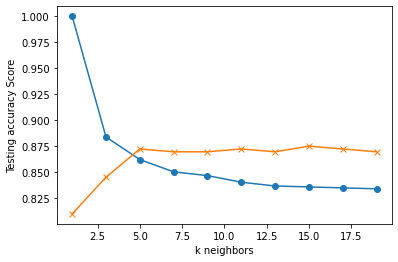

In [12]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [13]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=9 Test Acc: 0.870


In [14]:
new_X=pd.read_csv("../Resources/newEmployeeData.csv").drop(["EmploymentStatus"], axis=1)
new_predictions = knn.predict(new_X)
print(new_predictions)



[0 0 0 0 0]
